In [5]:
import h2o
h2o.init()


Checking whether there is an H2O instance running at http://localhost:54321 . connected.


H2O_cluster_uptime:,4 hours 15 mins
H2O_cluster_timezone:,Asia/Kolkata
H2O_data_parsing_timezone:,UTC
H2O_cluster_version:,3.30.0.7
H2O_cluster_version_age:,11 days
H2O_cluster_name:,H2O_from_python_mtech_abhijit_d329vz
H2O_cluster_total_nodes:,1
H2O_cluster_free_memory:,23.93 Gb
H2O_cluster_total_cores:,112
H2O_cluster_allowed_cores:,112
H2O_cluster_status:,"locked, healthy"


In [6]:
import pandas as pd
import numpy as np
from sklearn import model_selection
from sklearn import tree
from sklearn.ensemble import BaggingClassifier 
from sklearn.tree import DecisionTreeClassifier 
from sklearn.preprocessing import LabelEncoder 
import matplotlib.pyplot as plt
import seaborn as sns

#Loading the data set
#adding column names 
col_names = ["duration","protocol_type","service","flag","src_bytes",
    "dst_bytes","land","wrong_fragment","urgent","hot","num_failed_logins",
    "logged_in","num_compromised","root_shell","su_attempted","num_root",
    "num_file_creations","num_shells","num_access_files","num_outbound_cmds",
    "is_host_login","is_guest_login","count","srv_count","serror_rate",
    "srv_serror_rate","rerror_rate","srv_rerror_rate","same_srv_rate",
    "diff_srv_rate","srv_diff_host_rate","dst_host_count","dst_host_srv_count",
    "dst_host_same_srv_rate","dst_host_diff_srv_rate","dst_host_same_src_port_rate",
    "dst_host_srv_diff_host_rate","dst_host_serror_rate","dst_host_srv_serror_rate",
    "dst_host_rerror_rate","dst_host_srv_rerror_rate","label"]
train_data= pd.read_csv("train.csv", header=None, names = col_names)
test_data= pd.read_csv("test.csv", header=None, names = col_names)
print("Dimensions of train data set :",train_data.shape)
print("Dimensions of test data set :",test_data.shape)
train_data.head(5)




Dimensions of train data set : (9195, 42)
Dimensions of test data set : (9104, 42)


,duration,protocol_type,service,flag,src_bytes,dst_bytes,land,wrong_fragment,urgent,hot,...,dst_host_srv_count,dst_host_same_srv_rate,dst_host_diff_srv_rate,dst_host_same_src_port_rate,dst_host_srv_diff_host_rate,dst_host_serror_rate,dst_host_srv_serror_rate,dst_host_rerror_rate,dst_host_srv_rerror_rate,label
0,0,tcp,ftp_data,SF,491,0,0,0,0,0,...,25.0,0.17,0.03,0.17,0.00,0.00,0.00,0.05,0.00,normal
1,0,udp,other,SF,146,0,0,0,0,0,...,1.0,0.00,0.60,0.88,0.00,0.00,0.00,0.00,0.00,normal
2,0,tcp,private,S0,0,0,0,0,0,0,...,26.0,0.10,0.05,0.00,0.00,1.00,1.00,0.00,0.00,neptune
3,0,tcp,http,SF,232,8153,0,0,0,0,...,255.0,1.00,0.00,0.03,0.04,0.03,0.01,0.00,0.01,normal
4,0,tcp,http,SF,199,420,0,0,0,0,...,255.0,1.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,normal


In [7]:
#Viewing a statistical summary
train_data.describe()

,duration,src_bytes,dst_bytes,land,wrong_fragment,urgent,hot,num_failed_logins,logged_in,num_compromised,...,dst_host_count,dst_host_srv_count,dst_host_same_srv_rate,dst_host_diff_srv_rate,dst_host_same_src_port_rate,dst_host_srv_diff_host_rate,dst_host_serror_rate,dst_host_srv_serror_rate,dst_host_rerror_rate,dst_host_srv_rerror_rate
count,9195.000000,9.195000e+03,9.195000e+03,9195.0,9195.000000,9195.000000,9195.000000,9195.000000,9195.00000,9195.000000,...,9195.000000,9194.00000,9194.000000,9194.000000,9194.000000,9194.000000,9194.000000,9194.000000,9194.000000,9194.000000
mean,304.634367,5.094999e+04,4.364285e+03,0.0,0.026319,0.000109,0.204133,0.001196,0.39478,0.116585,...,182.761610,113.92060,0.514648,0.081505,0.148532,0.031099,0.291809,0.285929,0.114809,0.117151
std,2672.524865,3.984155e+06,1.111841e+05,0.0,0.275461,0.010429,2.225337,0.040374,0.48883,5.347395,...,99.028505,110.80145,0.449228,0.181725,0.309052,0.108802,0.448367,0.449064,0.301978,0.315499
min,0.000000,0.000000e+00,0.000000e+00,0.0,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,...,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000e+00,0.000000e+00,0.0,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,...,85.000000,10.00000,0.050000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.000000,4.400000e+01,0.000000e+00,0.0,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,...,255.000000,58.00000,0.490000,0.030000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,0.000000,2.810000e+02,5.650000e+02,0.0,0.000000,0.000000,0.000000,0.000000,1.00000,0.000000,...,255.000000,255.00000,1.000000,0.070000,0.070000,0.020000,1.000000,1.000000,0.000000,0.000000
max,41802.000000,3.817091e+08,5.150772e+06,0.0,3.000000,1.000000,77.000000,2.000000,1.00000,462.000000,...,255.000000,255.00000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [8]:
#printing training and testing instances
print("Training instances :")
print(train_data['label'].value_counts())
print("------------------------------------------------")
print("Testing instances :")
print(test_data['label'].value_counts())

Training instances :
normal             4892
neptune            3058
ipsweep             245
satan               241
portsweep           223
smurf               193
nmap                106
teardrop             78
warezclient          69
back                 65
pod                  11
buffer_overflow       3
warezmaster           3
guess_passwd          3
ftp_write             1
imap                  1
rootkit               1
multihop              1
Name: label, dtype: int64
------------------------------------------------
Testing instances :
normal             3852
neptune            1876
guess_passwd        508
mscan               391
warezmaster         380
satan               312
apache2             301
smurf               294
processtable        294
back                150
saint               136
snmpguess           131
mailbomb            120
snmpgetattack        70
portsweep            68
httptunnel           54
ipsweep              51
nmap                 33
pod                 

In [9]:
# colums that are categorical and not binary yet: protocol_type (column 2), service (column 3), flag (column 4).
# explore categorical features
print('Training set:')
for col_name in train_data.columns:
    if train_data[col_name].dtypes == 'object' :
        unique_cat = len(train_data[col_name].unique())
        print("Feature '{col_name}' has {unique_cat} categories".format(col_name=col_name, unique_cat=unique_cat))

#see how distributed the feature service is, it is evenly distributed and therefore we need to make dummies for all.
print()
print('Distribution of categories in service:')
print(train_data['service'].value_counts().sort_values(ascending=False).head())

Training set:
Feature 'protocol_type' has 3 categories
Feature 'service' has 64 categories
Feature 'flag' has 11 categories
Feature 'label' has 19 categories

Distribution of categories in service:
http        2920
private     1651
domain_u     627
smtp         533
ftp_data     493
Name: service, dtype: int64


In [10]:
# Test set
print('Test set:')
for col_name in test_data.columns:
    if test_data[col_name].dtypes == 'object' :
        unique_cat = len(test_data[col_name].unique())
        print("Feature '{col_name}' has {unique_cat} categories".format(col_name=col_name, unique_cat=unique_cat))



Test set:
Feature 'protocol_type' has 3 categories
Feature 'service' has 63 categories
Feature 'flag' has 11 categories
Feature 'label' has 37 categories


In [18]:
h2o.init()

Checking whether there is an H2O instance running at http://localhost:54321 . connected.


H2O_cluster_uptime:,4 hours 26 mins
H2O_cluster_timezone:,Asia/Kolkata
H2O_data_parsing_timezone:,UTC
H2O_cluster_version:,3.30.0.7
H2O_cluster_version_age:,11 days
H2O_cluster_name:,H2O_from_python_mtech_abhijit_d329vz
H2O_cluster_total_nodes:,1
H2O_cluster_free_memory:,23.93 Gb
H2O_cluster_total_cores:,112
H2O_cluster_allowed_cores:,112
H2O_cluster_status:,"locked, healthy"


In [29]:
final_set = pd.concat([train_data,test_data])

In [30]:
final_set.shape

(18299, 42)

In [31]:

h2o_df = h2o.H2OFrame(final_set)

Parse progress: |█████████████████████████████████████████████████████████| 100%


In [32]:
h2o_df.describe()

Rows:18299
Cols:42




,duration,protocol_type,service,flag,src_bytes,dst_bytes,land,wrong_fragment,urgent,hot,num_failed_logins,logged_in,num_compromised,root_shell,su_attempted,num_root,num_file_creations,num_shells,num_access_files,num_outbound_cmds,is_host_login,is_guest_login,count,srv_count,serror_rate,srv_serror_rate,rerror_rate,srv_rerror_rate,same_srv_rate,diff_srv_rate,srv_diff_host_rate,dst_host_count,dst_host_srv_count,dst_host_same_srv_rate,dst_host_diff_srv_rate,dst_host_same_src_port_rate,dst_host_srv_diff_host_rate,dst_host_serror_rate,dst_host_srv_serror_rate,dst_host_rerror_rate,dst_host_srv_rerror_rate,label
type,int,enum,enum,enum,int,int,int,int,int,int,int,int,int,int,int,int,int,int,int,int,int,int,int,int,real,real,real,real,real,real,real,int,int,real,real,real,real,real,real,real,real,enum
mins,0.0,,,,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,
mean,266.4242854800803,,,,32062.191540521293,3148.300016394328,5.4647794961473305e-05,0.016776873053172298,0.0004918301546532598,0.14973495819443686,0.011585332531832342,0.41565112847696595,0.11426853926444071,0.001967320618613039,0.0006011257445762063,0.11558008634351603,0.009126181758566046,0.0008197169244220997,0.0037160500573801855,0.0,0.0001639433848844199,0.018962784851631238,82.18367123886514,29.684245040712568,0.19681403355374677,0.1962609978687367,0.1783736816219465,0.17782829662823038,0.6981097327722866,0.07823050439914785,0.0949303240614239,188.55860976009615,126.68428243523844,0.558846322002402,0.08652639632746771,0.14330582577330858,0.025033883484533784,0.1941195759099367,0.19236036725325148,0.17481637337413902,0.1724527270739973,
maxs,54451.0,,,,381709090.0,5150772.0,1.0,3.0,2.0,77.0,3.0,1.0,611.0,1.0,2.0,684.0,29.0,2.0,3.0,0.0,1.0,1.0,511.0,511.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,255.0,255.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,
sigma,2145.5833589121753,,,,2862358.0825350727,79763.46920105552,0.007392414690848539,0.2152571433730525,0.02664992025240228,1.6193665851818013,0.11003430279820074,0.4928473817953143,6.028079740168581,0.04431204771039389,0.030474610968739435,6.669568416588734,0.34305851162827566,0.032213240694772285,0.06845551421783323,0.0,0.012803338065372113,0.13639726654736029,121.55657291882994,81.95925223941988,0.39156298136655276,0.39286148351937056,0.37541077445550136,0.37713721477548395,0.4291141971413311,0.22276309434810734,0.25191104602621595,96.57687163737744,112.05731838033651,0.44494602587607485,0.20235758852981006,0.3109520902255527,0.09638864333030223,0.38312460126638853,0.3862675793065252,0.35281046930492754,0.3655978042520197,
zeros,16111,,,,6724,8779,18298,18174,18292,17703,18092,10693,18048,18263,18291,18226,18259,18286,18238,18299,18296,17952,1,1,14040,14350,14801,14843,470,11920,14261,2,2,1082,7067,9741,12992,13135,13821,12921,13981,
missing,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,1,1,1,1,1,1,1,0
0,0.0,tcp,ftp_data,SF,491.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2.0,2.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,150.0,25.0,0.17,0.03,0.17,0.0,0.0,0.0,0.05,0.0,normal
1,0.0,udp,other,SF,146.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,13.0,1.0,0.0,0.0,0.0,0.0,0.08,0.15,0.0,255.0,1.0,0.0,0.6,0.88,0.0,0.0,0.0,0.0,0.0,normal
2,0.0,tcp,private,S0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,123.0,6.0,1.0,1.0,0.0,0.0,0.05,0.07,0.0,255.0,26.0,0.1,0.05,0.0,0.0,1.0,1.0,0.0,0.0,neptune


In [40]:
train,test = h2o_df.split_frame(ratios=[.75])
x = train.columns
y = 'label'
x.remove(y)

In [41]:
from h2o.automl import H2OAutoML

In [42]:
aml = H2OAutoML(seed = 1,project_name = 'srinivas')

%time aml.train(x=x,y=y,training_frame = train)

AutoML progress: |████████████████████████████████████████████████████████| 100%
CPU times: user 9min 20s, sys: 41.8 s, total: 10min 1s
Wall time: 1h 7min 10s


In [43]:
lb = aml.leaderboard
lb.head(rows = lb.nrows)

model_id,mean_per_class_error,logloss,rmse,mse
GBM_4_AutoML_20200801_233226,0.377229,0.0892151,0.13079,0.0171061
GBM_grid__1_AutoML_20200801_233226_model_14,0.389953,0.0931584,0.139625,0.0194952
GBM_2_AutoML_20200801_233226,0.393444,0.0882294,0.131322,0.0172453
GBM_3_AutoML_20200801_233226,0.395077,0.0843438,0.130679,0.0170771
GBM_grid__1_AutoML_20200801_233226_model_8,0.399507,0.093073,0.137468,0.0188976
XGBoost_grid__1_AutoML_20200801_233226_model_1,0.401032,0.0737839,0.124854,0.0155885
GBM_1_AutoML_20200801_233226,0.403431,0.0967609,0.138295,0.0191256
GBM_grid__1_AutoML_20200801_233226_model_6,0.408789,0.0882991,0.130888,0.0171316
DeepLearning_grid__1_AutoML_20200801_233226_model_1,0.415337,0.216636,0.177882,0.031642
DRF_1_AutoML_20200801_233226,0.416584,0.122048,0.149883,0.022465


In [59]:
se = aml.leader


In [62]:
se.predict(test)

gbm prediction progress: |████████████████████████████████████████████████| 100%


predict,apache2,back,buffer_overflow,ftp_write,guess_passwd,httptunnel,imap,ipsweep,land,loadmodule,mailbomb,mscan,multihop,named,nan,neptune,nmap,normal,perl,pod,portsweep,processtable,ps,rootkit,saint,satan,sendmail,smurf,snmpgetattack,snmpguess,sqlattack,teardrop,udpstorm,warezclient,warezmaster,worm,xlock,xsnoop,xterm
normal,7.19013e-07,1.03812e-06,7.18797e-07,7.19012e-07,7.18957e-07,7.18943e-07,7.19022e-07,7.3576e-07,7.19015e-07,7.18985e-07,7.18999e-07,7.18957e-07,7.18833e-07,7.18968e-07,0.000170075,7.18915e-07,7.18947e-07,0.999633,7.18983e-07,7.18988e-07,7.22266e-07,8.43761e-07,7.18911e-07,7.18943e-07,7.18807e-07,1.32832e-06,7.18949e-07,7.18987e-07,7.19056e-07,7.1904e-07,7.18958e-07,7.18994e-07,7.19012e-07,7.18933e-07,7.56131e-07,7.19046e-07,7.19012e-07,0.000170075,7.18546e-07
neptune,3.06064e-07,3.06044e-07,3.05991e-07,3.06043e-07,3.06034e-07,3.06019e-07,3.06026e-07,3.1318e-07,3.06051e-07,3.0605e-07,3.06058e-07,3.06034e-07,3.05942e-07,3.06022e-07,7.238e-05,0.999841,3.0605e-07,2.89046e-06,3.06042e-07,3.06043e-07,3.07408e-07,3.06055e-07,3.06002e-07,3.06027e-07,3.09774e-07,9.0684e-07,3.06038e-07,3.06048e-07,3.04782e-07,3.0606e-07,3.06034e-07,3.08804e-07,3.06055e-07,3.06033e-07,3.06039e-07,3.0606e-07,3.06042e-07,7.238e-05,3.06041e-07
neptune,3.06057e-07,3.06039e-07,3.05966e-07,3.06048e-07,3.06026e-07,3.06028e-07,3.06038e-07,3.90117e-07,3.0605e-07,3.06051e-07,3.06052e-07,3.06019e-07,3.05928e-07,3.05894e-07,7.238e-05,0.999841,3.06031e-07,2.6545e-06,3.06039e-07,3.06036e-07,3.07406e-07,3.06047e-07,3.05996e-07,3.06014e-07,3.05979e-07,6.23061e-07,3.06026e-07,3.06043e-07,3.06049e-07,3.06048e-07,3.06037e-07,3.06046e-07,3.06055e-07,3.06038e-07,3.06038e-07,3.06051e-07,3.06035e-07,7.238e-05,3.06033e-07
neptune,3.06066e-07,3.06043e-07,3.05991e-07,3.06043e-07,3.0601e-07,3.06041e-07,3.06044e-07,3.1318e-07,3.0605e-07,3.06049e-07,3.06058e-07,3.05967e-07,3.05715e-07,3.05997e-07,7.238e-05,0.999841,3.06046e-07,2.96782e-06,3.06041e-07,3.06043e-07,3.07408e-07,3.06055e-07,3.056e-07,3.06026e-07,3.09774e-07,9.06836e-07,3.06032e-07,3.06048e-07,4.63065e-07,3.06054e-07,3.06034e-07,3.08804e-07,3.06055e-07,3.06033e-07,3.06036e-07,3.06059e-07,3.06042e-07,7.238e-05,3.06041e-07
normal,7.12534e-07,7.12459e-07,7.12284e-07,7.12517e-07,7.12421e-07,7.12428e-07,7.12499e-07,7.2908e-07,7.12491e-07,7.12473e-07,7.12504e-07,7.1244e-07,7.12311e-07,7.12451e-07,0.000168533,7.12399e-07,7.1243e-07,0.999637,7.12481e-07,7.12492e-07,7.15727e-07,7.12508e-07,7.12396e-07,7.12428e-07,7.12292e-07,1.3163e-06,7.12448e-07,7.12499e-07,7.12527e-07,7.12529e-07,7.12464e-07,7.12488e-07,7.12516e-07,7.12419e-07,7.12461e-07,7.1254e-07,7.125e-07,0.000168533,7.12298e-07
neptune,3.06051e-07,3.06037e-07,3.05973e-07,3.06051e-07,3.06023e-07,3.06019e-07,3.06003e-07,5.21673e-07,3.06038e-07,3.06051e-07,3.06046e-07,3.06018e-07,3.05921e-07,3.06006e-07,7.238e-05,0.999841,3.05997e-07,2.96703e-06,3.06042e-07,3.06024e-07,3.06906e-07,3.0604e-07,3.05996e-07,3.06006e-07,3.05998e-07,6.50597e-07,3.06021e-07,3.06034e-07,3.06046e-07,3.06043e-07,3.0603e-07,3.06048e-07,3.06055e-07,3.06037e-07,3.06033e-07,3.06053e-07,3.74829e-07,7.238e-05,3.06028e-07
neptune,3.06064e-07,3.06044e-07,3.05991e-07,3.0605e-07,3.06034e-07,3.06019e-07,3.06028e-07,3.1318e-07,3.06051e-07,3.0605e-07,3.06054e-07,3.06034e-07,3.05958e-07,3.06022e-07,7.238e-05,0.999841,3.06048e-07,2.89046e-06,3.06042e-07,3.06046e-07,3.07408e-07,3.06051e-07,3.06002e-07,3.06027e-07,3.09774e-07,9.06824e-07,3.06039e-07,3.06048e-07,3.04783e-07,3.06054e-07,3.06027e-07,3.08804e-07,3.06055e-07,3.06033e-07,3.06035e-07,3.0605e-07,3.06042e-07,7.238e-05,3.06041e-07
normal,6.6113e-07,6.61063e-07,6.60897e-07,6.61114e-07,6.61034e-07,6.61076e-07,6.61108e-07,6.76479e-07,6.61096e-07,6.61073e-07,6.61127e-07,6.61042e-07,6.60873e-07,6.61053e-07,0.000156375,6.61004e-07,6.61026e-07,0.999663,6.6108e-07,6.61097e-07,6.64086e-07,6.61118e-07,6.60953e-07,6.61027e-07,6.60906e-07,1.22134e-06,6.6105e-07,6.61097e-07,6.61137e-07,6.61139e-07,6.61065e-07,6.61097e-07,6.61115e-07,6.61022e-07,6.6106

In [63]:
se.model_performance(test)


ModelMetricsMultinomial: gbm
** Reported on test data. **

MSE: 0.018699799072705452
RMSE: 0.1367472086468512
LogLoss: 0.08515510798259422
Mean Per-Class Error: 0.20367449669128446

Confusion Matrix: Row labels: Actual class; Column labels: Predicted class


,apache2,back,buffer_overflow,ftp_write,guess_passwd,httptunnel,imap,ipsweep,land,loadmodule,...,teardrop,udpstorm,warezclient,warezmaster,worm,xlock,xsnoop,xterm,Error,Rate
0,76.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.012987,1 / 77
1,1.0,52.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.018868,1 / 53
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.000000,3 / 3
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,NaN,0 / 0
4,0.0,0.0,0.0,0.0,114.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.042017,5 / 119
5,0.0,0.0,0.0,0.0,0.0,12.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0 / 12
6,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,NaN,0 / 0
7,0.0,0.0,0.0,0.0,0.0,0.0,0.0,65.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0 / 65
8,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,NaN,0 / 0
9,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0 / 1



See the whole table with table.as_data_frame()

Top-10 Hit Ratios: 


,k,hit_ratio
0,1,0.977258
1,2,0.993658
2,3,0.993877
3,4,0.993877
4,5,0.993877
5,6,0.993877
6,7,0.993877
7,8,0.993877
8,9,0.993877
9,10,0.993877


In [64]:
model_ids = list(aml.leaderboard['model_id'].as_data_frame().iloc[:,0])

In [65]:
model_ids

['GBM_4_AutoML_20200801_233226',
 'GBM_grid__1_AutoML_20200801_233226_model_14',
 'GBM_2_AutoML_20200801_233226',
 'GBM_3_AutoML_20200801_233226',
 'GBM_grid__1_AutoML_20200801_233226_model_8',
 'XGBoost_grid__1_AutoML_20200801_233226_model_1',
 'GBM_1_AutoML_20200801_233226',
 'GBM_grid__1_AutoML_20200801_233226_model_6',
 'DeepLearning_grid__1_AutoML_20200801_233226_model_1',
 'DRF_1_AutoML_20200801_233226',
 'GBM_grid__1_AutoML_20200801_233226_model_11',
 'GBM_grid__1_AutoML_20200801_233226_model_15',
 'GBM_grid__1_AutoML_20200801_233226_model_1',
 'GBM_grid__1_AutoML_20200801_233226_model_10',
 'XGBoost_grid__1_AutoML_20200801_233226_model_4',
 'GBM_grid__1_AutoML_20200801_233226_model_2',
 'GBM_grid__1_AutoML_20200801_233226_model_9',
 'GBM_grid__1_AutoML_20200801_233226_model_13',
 'XGBoost_grid__1_AutoML_20200801_233226_model_2',
 'GBM_grid__1_AutoML_20200801_233226_model_5',
 'GBM_grid__1_AutoML_20200801_233226_model_7',
 'GBM_grid__1_AutoML_20200801_233226_model_4',
 'GBM_5_Au

In [67]:
out = h2o.get_model([mid for mid in model_ids if "XGBoost" in mid][0])

In [68]:
out

Model Details
H2OXGBoostEstimator :  XGBoost
Model Key:  XGBoost_grid__1_AutoML_20200801_233226_model_1


Model Summary: 


,,number_of_trees
0,,41.0




ModelMetricsMultinomial: xgboost
** Reported on train data. **

MSE: 0.0004723233118601839
RMSE: 0.021733000525932536
LogLoss: 0.0036088676593131756
Mean Per-Class Error: 0.0014582314873794737

Confusion Matrix: Row labels: Actual class; Column labels: Predicted class


,apache2,back,buffer_overflow,ftp_write,guess_passwd,httptunnel,imap,ipsweep,land,loadmodule,...,teardrop,udpstorm,warezclient,warezmaster,worm,xlock,xsnoop,xterm,Error,Rate
0,224.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0 / 224
1,0.0,162.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0 / 162
2,0.0,0.0,9.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0 / 9
3,0.0,0.0,0.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0 / 2
4,0.0,0.0,0.0,0.0,392.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0 / 392
5,0.0,0.0,0.0,0.0,0.0,42.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0 / 42
6,0.0,0.0,0.0,0.0,0.0,0.0,2.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0 / 2
7,0.0,0.0,0.0,0.0,0.0,0.0,0.0,231.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0 / 231
8,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0 / 1
9,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0 / 1



See the whole table with table.as_data_frame()

Top-10 Hit Ratios: 


,k,hit_ratio
0,1,0.99949
1,2,1.00000
2,3,1.00000
3,4,1.00000
4,5,1.00000
5,6,1.00000
6,7,1.00000
7,8,1.00000
8,9,1.00000
9,10,1.00000



ModelMetricsMultinomial: xgboost
** Reported on cross-validation data. **

MSE: 0.015588519712600135
RMSE: 0.12485399357890054
LogLoss: 0.07378393213934928
Mean Per-Class Error: 0.4010322648854192

Confusion Matrix: Row labels: Actual class; Column labels: Predicted class


,apache2,back,buffer_overflow,ftp_write,guess_passwd,httptunnel,imap,ipsweep,land,loadmodule,...,teardrop,udpstorm,warezclient,warezmaster,worm,xlock,xsnoop,xterm,Error,Rate
0,221.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.013393,3 / 224
1,0.0,162.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0 / 162
2,0.0,0.0,2.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.777778,7 / 9
3,0.0,0.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.000000,2 / 2
4,0.0,0.0,0.0,0.0,388.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.010204,4 / 392
5,0.0,0.0,0.0,0.0,0.0,35.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.166667,7 / 42
6,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.000000,2 / 2
7,0.0,0.0,0.0,0.0,0.0,0.0,0.0,228.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.012987,3 / 231
8,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.000000,1 / 1
9,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.000000,1 / 1



See the whole table with table.as_data_frame()

Top-10 Hit Ratios: 


,k,hit_ratio
0,1,0.981568
1,2,0.994682
2,3,0.996576
3,4,0.997232
4,5,0.997741
5,6,0.997814
6,7,0.997887
7,8,0.998179
8,9,0.998179
9,10,0.998251



Cross-Validation Metrics Summary: 


,,mean,sd,cv_1_valid,cv_2_valid,cv_3_valid,cv_4_valid,cv_5_valid
0,accuracy,0.98156774,0.0039543244,0.98252004,0.98615664,0.9788707,0.97632056,0.9839709
1,err,0.018432243,0.0039543244,0.017479971,0.013843352,0.021129327,0.023679417,0.016029144
2,err_count,50.6,10.853571,48.0,38.0,58.0,65.0,44.0
3,logloss,0.07378466,0.017780881,0.06384966,0.06366914,0.080811605,0.10185365,0.05873923
4,max_per_class_error,1.0,0.0,1.0,1.0,1.0,1.0,1.0
5,mean_per_class_accuracy,0.80098623,0.07776358,0.88473636,0.85032076,0.7497306,0.69386905,0.82627434
6,mean_per_class_error,0.19901378,0.07776358,0.11526366,0.14967926,0.25026938,0.30613098,0.17372565
7,mse,0.015588595,0.0031936674,0.014556206,0.0127849635,0.017814333,0.019972945,0.012814529
8,r2,0.9995166,8.854674E-5,0.999572,0.99956197,0.9994707,0.99938273,0.99959546
9,rmse,0.1243434,0.012615159,0.12064911,0.113070615,0.13347034,0.14132567,0.113201275



Scoring History: 


,,timestamp,duration,number_of_trees,training_rmse,training_logloss,training_classification_error
0,,2020-08-01 23:44:39,1 min 42.009 sec,0.0,0.974359,3.663562,0.521128
1,,2020-08-01 23:44:41,1 min 43.830 sec,5.0,0.135815,0.083320,0.010200
2,,2020-08-01 23:44:43,1 min 45.392 sec,10.0,0.080161,0.031544,0.003278
3,,2020-08-01 23:44:44,1 min 46.978 sec,15.0,0.054093,0.015989,0.001603
4,,2020-08-01 23:44:47,1 min 49.762 sec,20.0,0.041480,0.010069,0.001020
5,,2020-08-01 23:44:49,1 min 51.368 sec,25.0,0.034305,0.007251,0.000729
6,,2020-08-01 23:44:51,1 min 53.146 sec,30.0,0.029658,0.005649,0.000583
7,,2020-08-01 23:44:52,1 min 54.738 sec,35.0,0.025396,0.004490,0.000583
8,,2020-08-01 23:44:54,1 min 56.331 sec,40.0,0.022227,0.003727,0.000510
9,,2020-08-01 23:44:54,1 min 56.890 sec,41.0,0.021733,0.003609,0.000510



Variable Importances: 


,variable,relative_importance,scaled_importance,percentage
0,src_bytes,43504.371094,1.000000,0.292192
1,diff_srv_rate,38242.968750,0.879060,0.256855
2,dst_host_srv_count,7729.838379,0.177680,0.051917
3,count,7259.810547,0.166875,0.048760
4,protocol_type.tcp,4741.628906,0.108992,0.031847
5,duration,3651.427246,0.083932,0.024524
6,num_failed_logins,3638.041748,0.083625,0.024435
7,dst_bytes,3346.606689,0.076926,0.022477
8,service.pop_3,3203.173340,0.073629,0.021514
9,dst_host_same_src_port_rate,2812.735352,0.064654,0.018891



See the whole table with table.as_data_frame()


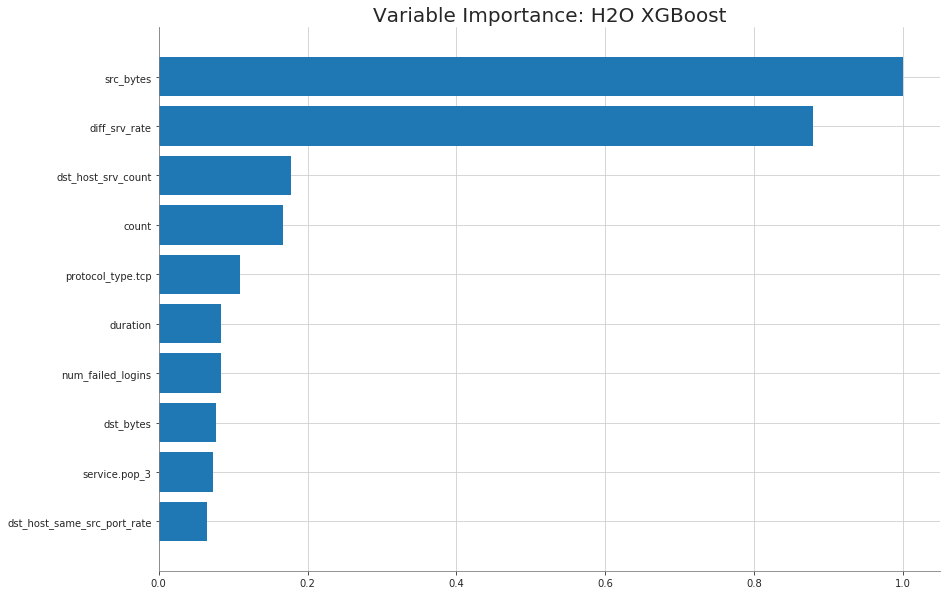

In [69]:
out.varimp_plot()

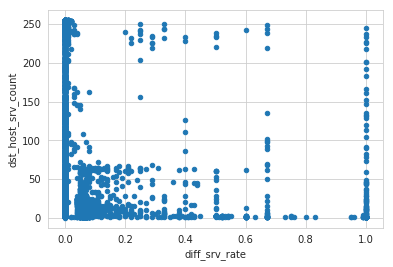

In [73]:
train_data.plot(kind='scatter', x='diff_srv_rate', y='dst_host_srv_count') ;
plt.show()

/home/mtech_abhijit/anaconda3/lib/python3.7/site-packages/seaborn/axisgrid.py:230: UserWarning: The `size` paramter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


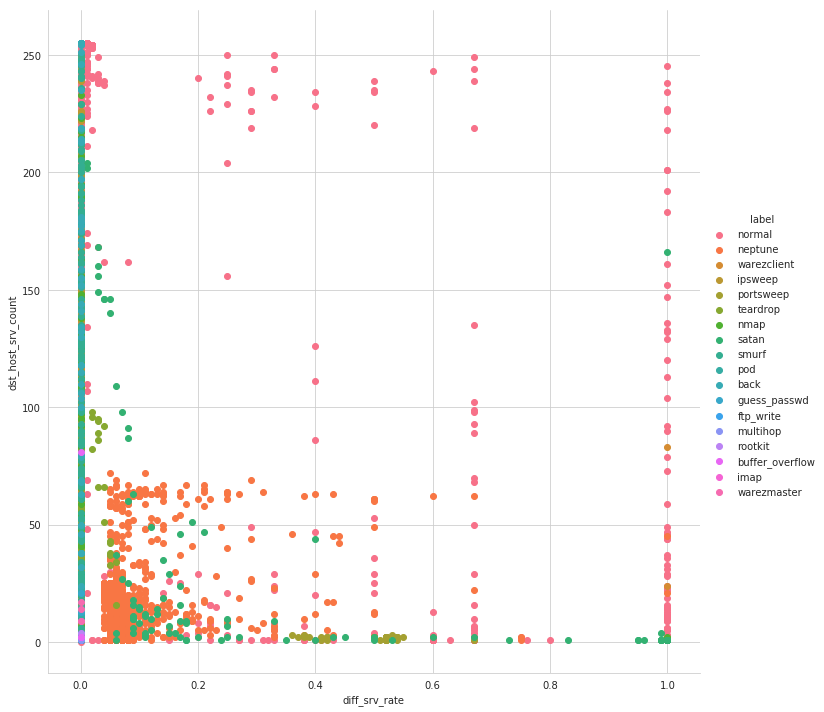

In [76]:
sns.set_style("whitegrid");
sns.FacetGrid(train_data, hue="label", size=10) \
   .map(plt.scatter, "diff_srv_rate", "dst_host_srv_count") \
   .add_legend();
plt.show();